In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import csv

In [2]:
historical_data = yf.download('AAPL', start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
historical_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.888065,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.880943,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.070827,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.538448,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.384148,82271200
...,...,...,...,...,...,...
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,147.410004,50547000
2023-03-01,146.830002,147.229996,145.009995,145.309998,145.309998,55479000


In [4]:
#choose stocks with highest RoE
stocklist = []
stocks_name = []
stocksroe = []

with open ('list_stocks.csv', 'rt') as stocks_csv: #read the companies of s&p 500
    reader = csv.reader(stocks_csv)
    for i in stocks_csv:
        line = i.split(';')
        stocklist.append(line[1].strip())
        stocks_name.append(line[0].strip())


In [5]:

stocks = stocklist
#weights = [0.2, 0.2, 0.2, 0.2, 0.2] #percentage of the components in portfolio

historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected

close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price
portfolio_return = (close_price * len(stocks)).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

[*********************100%***********************]  29 of 29 completed


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


C:\Users\ivana\AppData\Roaming\Python\Python39\site-packages\matplotlib\ticker.py:2101: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


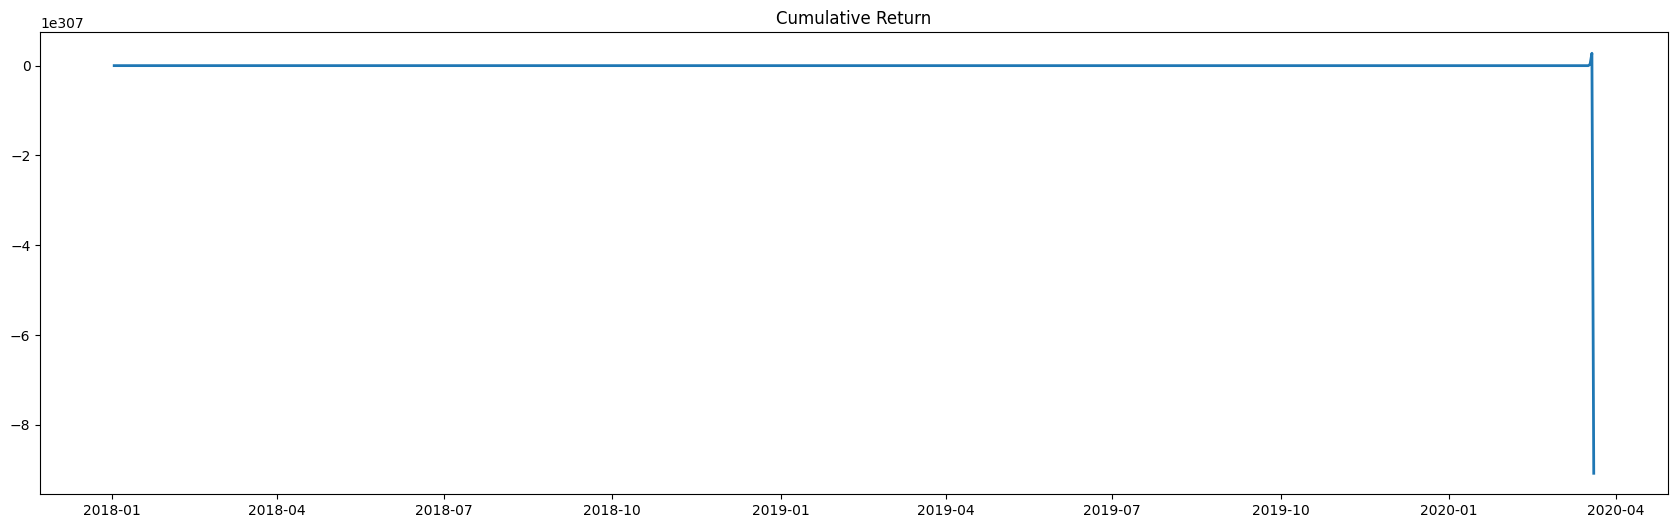

In [6]:
#data visualization
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

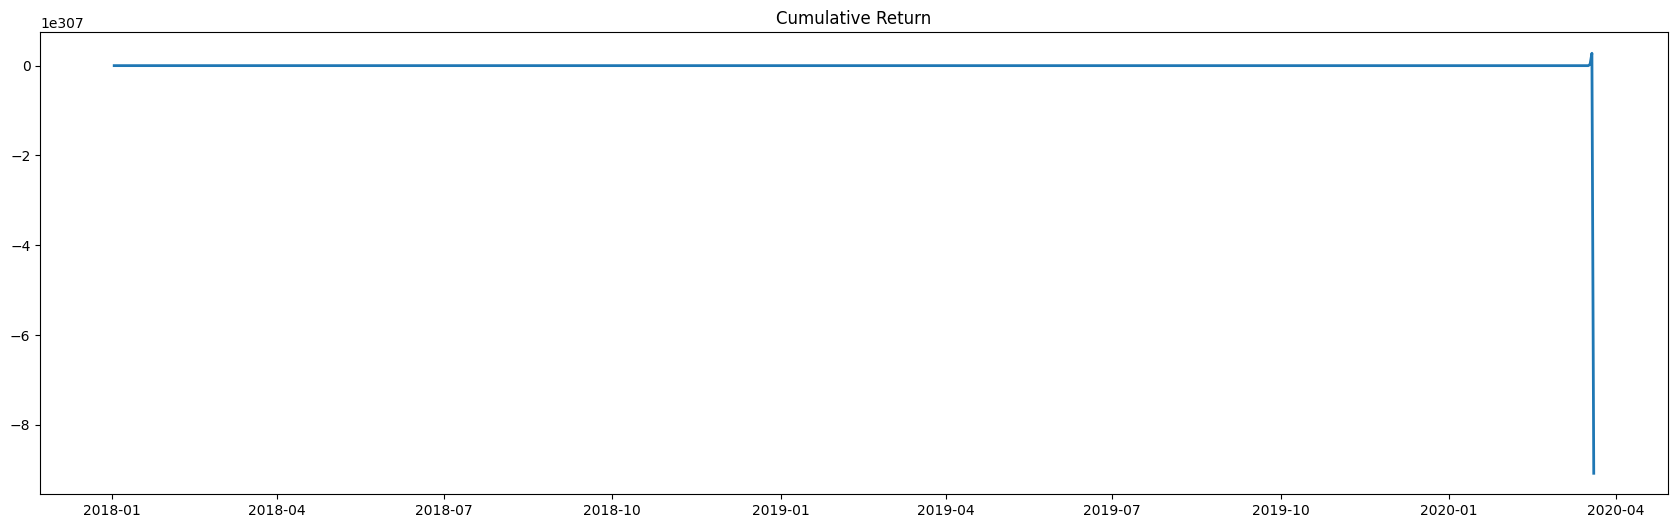

In [7]:
#data visualization
x = cumulative_return.keys()
y = cumulative_return

fig, ax = plt.subplots(figsize=(21,6))
ax.plot(x, y, linewidth=2.0)
ax.set_title('Cumulative Return')

plt.show()

In [8]:
portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

In [9]:
# El Ratio de Sharpe es la rentabilidad que ofrece una inversión por cada unidad de riesgo que asume.
max_sharpe_ratio = np.argmax(portfolio_sharpe)
max_portfolio_weights = portfolio_weights[max_sharpe_ratio]
print(f"Max sharpe ratio: {portfolio_sharpe[max_sharpe_ratio]}")

print("portfolio")
for i in range(len(max_portfolio_weights)):
    print(close_price.columns[i], max_portfolio_weights[i])


Max sharpe ratio: 0.6146438663800561
portfolio
AAPL 0.05971168900640129
AMGN 0.03085721167321076
AXP 0.0608812563763554
BA 0.011514128023413636
CAT 0.002728986985979374
CRM 0.04975736903404516
CSCO 0.017298621508865367
CVX 0.058037276170173825
DIS 0.03244698235729898
DOW 0.006753335042383785
GS 0.05626884071252412
HD 0.01891268013478683
HON 0.000817725174343308
IBM 0.025152033156972398
INTC 0.007180620382075597
JNJ 0.05892787826869464
JPM 0.03694220135191308
KO 0.03815425490380826
MCD 0.0030806135009663156
MMM 0.0034584384311729987
MRK 0.05189122110536403
MSFT 0.04831280709605563
NKE 0.05859598271940715
PG 0.05071099050491731
TRV 0.03559707555622351
UNH 0.04658028302648106
V 0.02510219617975474
VZ 0.058386971802852544
WMT 0.045940329813558965


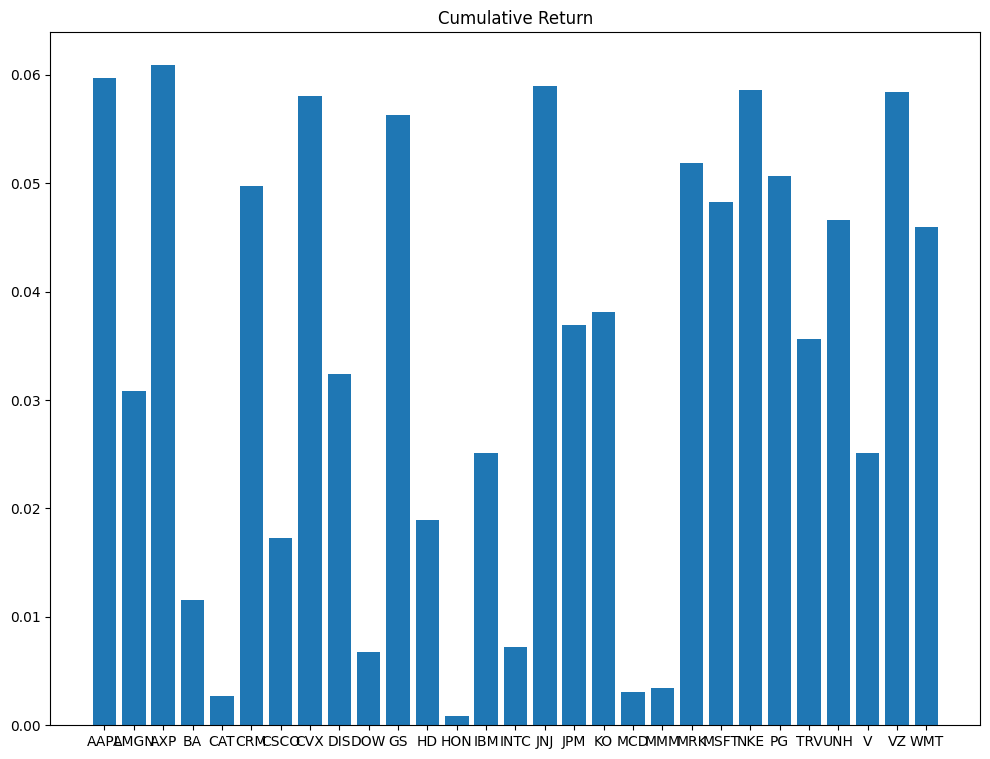

In [10]:
#Portfolio Composition with max sharpe ratio
#data 
x = close_price.columns
y = max_portfolio_weights

fig, ax = plt.subplots(figsize=(12,9))
ax.bar(x, y)
ax.set_title('Cumulative Return')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

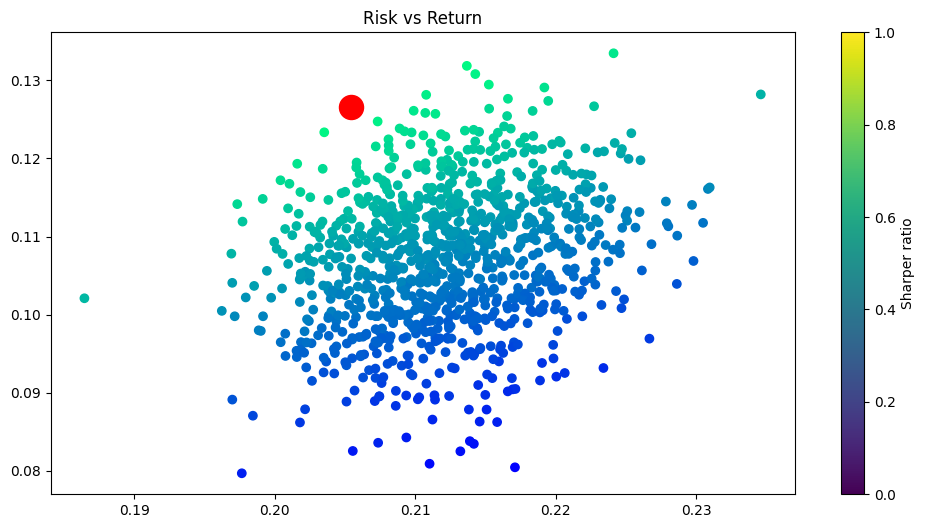

In [11]:
# Efficient Frontier
max_ratio = max_sharpe_ratio

x = portfolio_risk
y = portfolio_returns


fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x, y, c=portfolio_sharpe, cmap='winter') #Efficient Frontier between risk and return
ax.set_title('Risk vs Return')

plt.scatter(x[max_ratio], y[max_ratio], color='r', marker='o', s=300) #sharpe ratio
plt.colorbar(label='Sharper ratio')

plt.show

In [12]:
#Data of all stocks

stocks = stocklist
weights = []
for i in range(0,len(stocklist)):
    weights.append(100/len(stocklist))
    
historical_data = yf.download(stocks, start='2018-01-01') #download data from date selected
close_price = historical_data['Close'].pct_change() #percentage of return between open price and close price

# data for Power BI
close_price.to_csv('p_pct_change.csv')
historical_data['Close'].to_csv('p_close.csv')

portfolio_return = (close_price * weights).sum(axis=1)
cumulative_return = (portfolio_return + 1).cumprod()

portfolio_weights=[]
portfolio_returns=[]
portfolio_risk=[]
portfolio_sharpe=[]

def optimization(close):
    random_stocks = np.random.uniform(size=len(close.columns))
    random_stocks = random_stocks / np.sum(random_stocks)

    portfolio_weights.append(random_stocks) #portfolio percentage

    mean = (close.mean() * random_stocks).sum() * 252 #return
    portfolio_returns.append(mean)

    volatility = (close * random_stocks).sum(axis=1) #portfolio risk 
    annual_std = np.std(volatility) * np.sqrt(252)
    portfolio_risk.append(annual_std)

    sharpe_ratio = (np.mean(volatility) / np.std(volatility)) * np.sqrt(252)
    portfolio_sharpe.append(sharpe_ratio)


count = 1000
for k in range(0, count):
    optim = optimization(close_price)

[*********************100%***********************]  29 of 29 completed


In [13]:
# save files to power BI
def savecsv(filename, header, rows):
    with open (filename, "w", newline='' ,encoding='utf-8') as file:

        write = csv.writer(file)
        write.writerow(header)
        write.writerows(rows)

# portfolio weights
column_name = close_price.columns.to_list()
for i in ['Sharpe', 'returns', 'risk']:
    column_name.append(i)

datacsv1 = []

for i in range(len(portfolio_weights)):
    data = np.append(portfolio_weights[i], [portfolio_sharpe[i], portfolio_returns[i],portfolio_risk[i]])
    datacsv1.append(data)

savecsv("p_weights.csv", column_name, datacsv1)
